In [14]:
import pandas as pd
import matplotlib as mb
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',1000) 
Data = pd.read_excel("Otw4_mgr.xlsx")

In [12]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [15]:
Data.head()

,H,DCAL,Vsand,Vlime,Vpiryt,Vkerogen,VCL,PHI,CAL,DT,ILD,LL3,GG_Corr,GR,GRS_Corr,NPHICorr,POTA,THOR,URAN,RHOB,H (lab.),TOC[%]
0,2140.0,-0.0128,0.0004,0.1765,0.0003,0.0041,0.8139,0.0048,216.7230,72.4844,7.6422,8.4001,167.6206,156.7387,141.9023,0.269784,4.4496,12.0781,2.6066,2.6291,NaN,NaN
1,2140.1,-0.0126,0.0004,0.2073,0.0004,0.0064,0.7799,0.0056,216.6163,69.6094,7.5662,8.7858,166.1877,156.0812,138.8518,0.267325,4.2757,11.6609,2.7156,2.6241,NaN,NaN
2,2140.2,-0.0153,0.0004,0.2193,0.0004,0.0074,0.7643,0.0082,216.6214,69.9219,7.5112,8.8710,164.1903,155.7293,136.7406,0.265079,4.2074,11.2681,2.6954,2.6151,NaN,NaN
3,2140.3,-0.0110,0.0004,0.2276,0.0006,0.0093,0.7517,0.0104,216.8830,70.7031,7.4740,8.6120,163.7030,156.1934,135.1821,0.262727,4.1624,10.9243,2.7721,2.6033,NaN,NaN
4,2140.4,-0.0112,0.0590,0.1593,0.0006,0.0082,0.7637,0.0092,216.7306,72.2500,7.4429,8.1234,164.2229,157.3730,135.5044,0.260909,4.1305,11.1666,2.8005,2.6039,NaN,NaN


In [6]:
Data.tail()


,H,DCAL,Vsand,Vlime,Vpiryt,Vkerogen,VCL,PHI,CAL,DT,ILD,LL3,GG_Corr,GR,GRS_Corr,NPHICorr,POTA,THOR,URAN,RHOB,H (lab.),TOC[%]
291,2169.1,-0.0043,0.0678,0.0870,0.0003,0.0246,0.8089,0.0114,216.9414,86.4062,8.6659,9.5138,187.5641,171.6441,138.5311,0.297885,4.4004,8.9401,4.4576,2.5334,NaN,NaN
292,2169.2,-0.0033,0.0708,0.0963,0.0004,0.0272,0.7921,0.0132,217.0760,87.2188,8.8769,10.0199,187.8158,173.2143,137.1345,0.297243,4.3712,8.5072,4.5429,2.5255,2169.2,3.79
293,2169.3,-0.0046,0.0576,0.1268,0.0004,0.0283,0.7741,0.0128,216.9668,87.3594,9.0978,10.1930,186.7846,172.6497,134.4724,0.292417,4.2693,8.1092,4.6130,2.5318,NaN,NaN
294,2169.4,-0.0011,0.0477,0.1702,0.0004,0.0292,0.7399,0.0126,217.0379,86.5156,9.3280,10.0203,182.8867,169.7606,129.6296,0.281051,4.1765,7.3910,4.6176,2.5441,NaN,NaN
295,2169.5,-0.0007,0.0008,0.2977,0.0012,0.0318,0.6521,0.0164,217.0278,84.1094,9.5421,9.6740,174.1422,163.1046,121.2225,0.264015,4.0637,6.6245,4.5845,2.5571,NaN,NaN


In [24]:
features = list(Data.columns.values)
x = Data.loc[:,features].values


In [8]:
Data.dtypes

H           float64
DCAL        float64
Vsand       float64
Vlime       float64
Vpiryt      float64
Vkerogen    float64
VCL         float64
PHI         float64
CAL         float64
DT          float64
ILD         float64
LL3         float64
GG_Corr     float64
GR          float64
GRS_Corr    float64
NPHICorr    float64
POTA        float64
THOR        float64
URAN        float64
RHOB        float64
H (lab.)    float64
TOC[%]      float64
dtype: object

In [7]:
Data.shape


(296, 22)

In [11]:
Data.isna().sum()

H             0
DCAL          0
Vsand         0
Vlime         0
Vpiryt        0
Vkerogen      0
VCL           0
PHI           0
CAL           0
DT           10
ILD           0
LL3           0
GG_Corr       0
GR            0
GRS_Corr      0
NPHICorr      0
POTA          0
THOR          0
URAN          0
RHOB          0
H (lab.)    260
TOC[%]      261
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

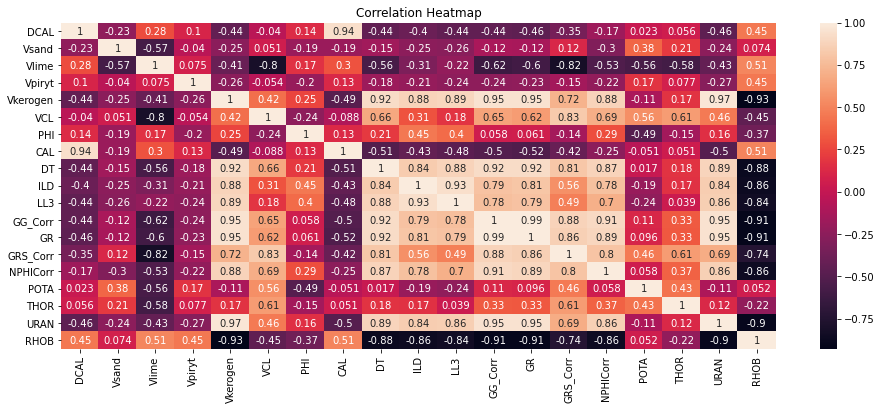

In [8]:
#standarized data
from sklearn import preprocessing
x = Data.iloc[:,1:20].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = features[1:20]
plt.figure(figsize = (16,6))
heatmap_corr = sns.heatmap(df.corr(),annot = True)
heatmap_corr.set_title("Correlation Heatmap")

In [9]:
df.describe()

,DCAL,Vsand,Vlime,Vpiryt,Vkerogen,VCL,PHI,CAL,DT,ILD,LL3,GG_Corr,GR,GRS_Corr,NPHICorr,POTA,THOR,URAN,RHOB
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,286.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,0.262532,0.237071,0.175357,0.115373,0.130991,0.756316,0.241672,0.274636,0.381276,0.086355,0.116992,0.409986,0.368165,0.555533,0.481071,0.624542,0.552944,0.233203,0.707628
std,0.165452,0.308681,0.182851,0.181790,0.259855,0.127517,0.199943,0.181792,0.216054,0.188944,0.202467,0.190089,0.218689,0.143398,0.167084,0.175769,0.174803,0.236597,0.210551
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.124320,0.000858,0.000476,0.011390,0.001553,0.706601,0.103321,0.100975,0.235171,0.012844,0.027205,0.304695,0.238929,0.455688,0.398109,0.514486,0.428632,0.114384,0.658472
50%,0.246828,0.003003,0.143266,0.018223,0.015140,0.755570,0.191882,0.310605,0.319639,0.019979,0.034684,0.351696,0.292883,0.541730,0.437779,0.609359,0.571656,0.158847,0.771241
75%,0.375378,0.505255,0.311904,0.157745,0.086762,0.845527,0.333948,0.415993,0.425619,0.041739,0.083595,0.424490,0.372476,0.621162,0.498692,0.726831,0.677403,0.226401,0.838556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Covariation Heatmap')

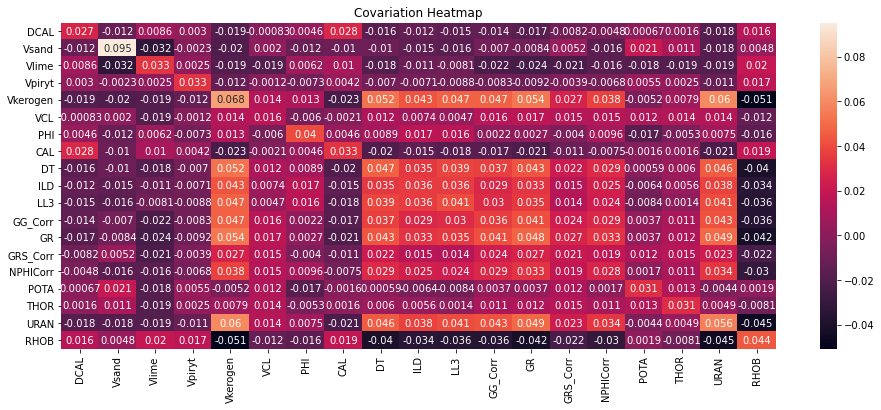

In [25]:
#standarized data
from sklearn import preprocessing
x = Data.iloc[:,1:20].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = features[1:20]
plt.figure(figsize = (16,6))
heatmap_corr = sns.heatmap(df.cov(),annot = True)
heatmap_corr.set_title("Covariation Heatmap")

In [17]:
Labeleddata = Data.dropna()

In [12]:
len(Labeleddata)

34

In [18]:
Labeleddata_withr8index = Labeleddata.reset_index(drop=True)
test_row = Labeleddata_withr8index.iloc[5]
R8data= Labeleddata_withr8index.drop(5)
R8data = R8data.reset_index(drop=True)
#R8data data with H and H lab and without extracted row with index 50 in labeled data and index 5 with reset_index
TOC = R8data["TOC[%]"]
R8data = R8data.drop(columns=["H", "H (lab.)","TOC[%]"])
TOC_row5=test_row["TOC[%]"]
#data for multilinear regression

In [19]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(R8data,TOC)

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
prognoza = linear_regression.predict(X_test)
oczekiwane = y_test
while(metrics.r2_score(oczekiwane,prognoza)) < 0.95:
    X_train, X_test, y_train, y_test = train_test_split(R8data,TOC)
    prognoza = linear_regression.predict(X_test)
    oczekiwane = y_test
    linear_regression = LinearRegression()
    linear_regression.fit(X=X_train, y=y_train)
    for i,name in enumerate(R8data.columns):
        print(f'{name:>10}: {linear_regression.coef_[i]}')
    print("Linear regression b parameter ",linear_regression.intercept_)
    prognoza = linear_regression.predict(X_test)
    oczekiwane = y_test
    
print(metrics.r2_score(oczekiwane,prognoza),metrics.mean_squared_error(oczekiwane,prognoza),)
#Linear model training



      DCAL: -52.52854185463531
     Vsand: -77.8866389931419
     Vlime: -80.90944116301542
    Vpiryt: -119.22510840528778
  Vkerogen: 417.0890475554186
       VCL: -49.18038359934134
       PHI: -89.88747539350713
       CAL: 0.29369364439235585
        DT: 0.015897352229286312
       ILD: -0.3325668165350775
       LL3: 0.036427269855917405
   GG_Corr: -0.8708454744496374
        GR: 0.1153081678664963
  GRS_Corr: 0.6566895184553311
  NPHICorr: 33.47561247111368
      POTA: -1.0867719707619614
      THOR: -0.46329926358706636
      URAN: 5.170608839124393
      RHOB: 12.788252700072139
Linear regression b parameter  -20.262738711739093
      DCAL: 38.40862300351107
     Vsand: 86.50982636856742
     Vlime: 116.66970446369164
    Vpiryt: 398.27880353730734
  Vkerogen: -820.8834855798087
       VCL: 28.60783635356919
       PHI: 190.81731484912686
       CAL: -0.931042587611229
        DT: 0.2514647406486124
       ILD: 0.45911219775915774
       LL3: -0.5493380904945444
   GG_Corr: 1

      DCAL: -44.58902800976023
     Vsand: -183.57166001032974
     Vlime: -182.1929697821236
    Vpiryt: -337.5650132806731
  Vkerogen: 848.0678157845049
       VCL: -40.50161782325045
       PHI: -104.23655488320914
       CAL: -0.37415931284502457
        DT: -0.006210977286750001
       ILD: 0.30597668730049665
       LL3: -0.8889099242140706
   GG_Corr: -0.8859272500724985
        GR: 0.08492799461189875
  GRS_Corr: 0.43337416716380994
  NPHICorr: -158.59979350139403
      POTA: -0.9410965201073568
      THOR: -0.7063355070659981
      URAN: 3.1048939910819273
      RHOB: 20.789630491050865
Linear regression b parameter  215.4951520491012
      DCAL: -12.530693312428898
     Vsand: -56.248462409198204
     Vlime: -57.609606759540654
    Vpiryt: 12.223332736061852
  Vkerogen: 261.3875362370496
       VCL: -39.32314348894156
       PHI: -120.42965631556162
       CAL: -0.25306868549202494
        DT: -0.03011220584871543
       ILD: -0.23478161901156125
       LL3: 0.014518028915177

      DCAL: -8.51783682976928
     Vsand: -46.50527623446861
     Vlime: -48.11288898994473
    Vpiryt: 4.744867369879098
  Vkerogen: 214.34071770317814
       VCL: 3.8053930075927735
       PHI: -128.27281285671094
       CAL: 0.06731416153572924
        DT: -0.14214805999085692
       ILD: 0.06703917159169791
       LL3: -0.05037381200830183
   GG_Corr: -0.038928181507479453
        GR: -0.03338271193314151
  GRS_Corr: -0.13473080262575793
  NPHICorr: -34.765966499777925
      POTA: 0.5703461959762409
      THOR: -0.26073264360482495
      URAN: -1.3085444035543201
      RHOB: -34.934518685509445
Linear regression b parameter  137.8858897352443
      DCAL: -10.18458880790018
     Vsand: -7.619856958826138
     Vlime: 9.39561381098364
    Vpiryt: 184.379119921153
  Vkerogen: -381.4019428229955
       VCL: -17.478215254454913
       PHI: 212.72528130225527
       CAL: 0.07645592488019942
        DT: 0.062116272565314164
       ILD: 0.0775579468357606
       LL3: -0.14726682614307854
  

      DCAL: -48.69493030546259
     Vsand: 37.229532283577946
     Vlime: 25.547322986741975
    Vpiryt: -131.4594207094099
  Vkerogen: 292.75540134792504
       VCL: 16.82464966664175
       PHI: -240.89748557246213
       CAL: -0.6688315148211702
        DT: 0.27880316620640966
       ILD: 0.009608496009569952
       LL3: 0.05694184104096753
   GG_Corr: -0.6373478062279133
        GR: 0.08742253448561317
  GRS_Corr: 0.4026516016540343
  NPHICorr: 149.16269486971703
      POTA: -0.3026914102691335
      THOR: -0.2187851385026894
      URAN: 3.758327506487515
      RHOB: 39.670090313115566
Linear regression b parameter  -8.56192526432596
      DCAL: -35.96669156836948
     Vsand: -47.52551773338384
     Vlime: -34.151598354219644
    Vpiryt: 109.35570149813971
  Vkerogen: -142.78321032943867
       VCL: -23.58180673926364
       PHI: 138.68643165799895
       CAL: 0.7473770831449241
        DT: -0.15099911229027302
       ILD: 0.04934795196337579
       LL3: -0.1535608195582903
   GG_C

      DCAL: -43.33045789859969
     Vsand: 33.443716761780095
     Vlime: 51.65010857251868
    Vpiryt: 243.89955669070739
  Vkerogen: -785.3108537409595
       VCL: -86.95173341688466
       PHI: 543.2692051330787
       CAL: 0.6282747472779425
        DT: 0.1570124228203627
       ILD: -0.9998638481238209
       LL3: 0.6837503392995559
   GG_Corr: 0.8371404986250496
        GR: 0.12401210207226582
  GRS_Corr: -0.5145171133881936
  NPHICorr: 132.55482283800026
      POTA: 0.837966927593837
      THOR: 1.5153451194570176
      URAN: -4.112192897825317
      RHOB: -7.948810976756705
Linear regression b parameter  -194.21561563647018
      DCAL: -46.587912136189466
     Vsand: 80.45364753798032
     Vlime: 74.5940913298667
    Vpiryt: -46.21941890894487
  Vkerogen: -1.925461404120872
       VCL: 27.701440026636927
       PHI: -134.60429858196773
       CAL: 0.19178164268642342
        DT: 0.11901163026176982
       ILD: 0.16358295564665223
       LL3: 0.08499278013036808
   GG_Corr: -0.2

Linear regression b parameter  165.856619235746
      DCAL: -50.253378504086285
     Vsand: -32.55866316051552
     Vlime: -13.097220778150286
    Vpiryt: 169.7606587974283
  Vkerogen: -148.25616253383868
       VCL: -28.120161631707813
       PHI: 52.27154930736706
       CAL: 1.5262606552638789
        DT: 0.09523462696173282
       ILD: 0.03663904768226469
       LL3: -0.19498938983707884
   GG_Corr: 0.47517432829517575
        GR: 0.13538499828067496
  GRS_Corr: -0.6019593399321356
  NPHICorr: -17.519629470424988
      POTA: 1.7199193804392694
      THOR: 0.7671307431221203
      URAN: -5.735516633594694
      RHOB: -54.541498767619636
Linear regression b parameter  -180.53076542381206
      DCAL: -11.642497590048807
     Vsand: 11.2051618436029
     Vlime: 13.83053019248849
    Vpiryt: 58.582561989180725
  Vkerogen: -103.16772797259547
       VCL: -5.59213563454132
       PHI: 25.141609582804477
       CAL: -0.04978805478583243
        DT: 0.008171464534205041
       ILD: 0.107820

       CAL: 0.38899812383541543
        DT: 0.05545539555581836
       ILD: -0.27981042667555933
       LL3: -0.0018717617249029695
   GG_Corr: -0.4059422752536879
        GR: 0.07614223648107923
  GRS_Corr: 0.3549012682381078
  NPHICorr: 0.7180791930930798
      POTA: -0.395252771964037
      THOR: -0.12569179665220057
      URAN: 2.701185766857916
      RHOB: 14.263426240224167
Linear regression b parameter  -64.51733934871869
      DCAL: -8.289513950651406
     Vsand: -40.76998968955818
     Vlime: -27.290472138511035
    Vpiryt: 120.90678413843891
  Vkerogen: 26.50070161407586
       VCL: -8.312363960836285
       PHI: -71.0346599640043
       CAL: -0.86345917288686
        DT: 0.04975539662534728
       ILD: -0.08145017496473363
       LL3: -0.1666370839154505
   GG_Corr: 0.26429090451824544
        GR: -0.005836101216328501
  GRS_Corr: -0.4263657337696379
  NPHICorr: -12.69898388899744
      POTA: 1.2221969519176599
      THOR: 0.713612839717889
      URAN: -3.5722672241867124
  

In [17]:
len(Labeleddata)

34

In [26]:
import random

print(random.randint(0,len(Labeleddata)-1))

5


0.9723612417267333 0.3450763119634083


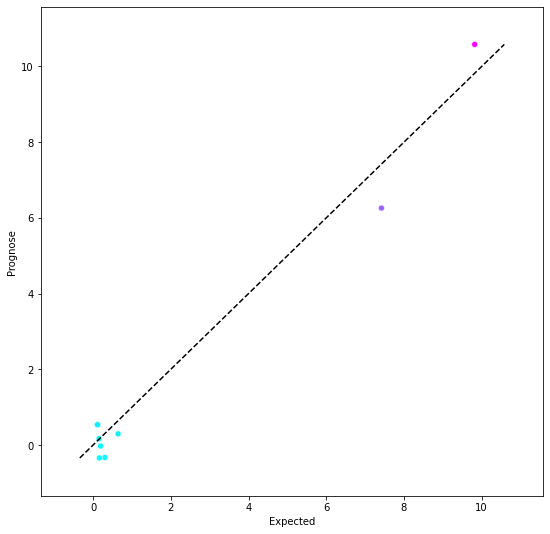

In [21]:
#Visualization
figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(x=oczekiwane,y = prognoza,hue = prognoza,palette="cool",legend = False)
axes.set(xlabel='Expected', ylabel='Prognose')
start = min(oczekiwane.min(),prognoza.min())
end = max(oczekiwane.max(),prognoza.max())
axes.set_xlim(start-1,end+1)
axes.set_ylim(start-1,end+1)
line = plt.plot([start,end],[start,end],"k--")
print(metrics.r2_score(oczekiwane,prognoza),metrics.mean_squared_error(oczekiwane,prognoza))



In [21]:
model_data = Data.drop(columns=["H", "H (lab.)","TOC[%]"])
model_data
# All these below is test with one deleted sample of TOC

,DCAL,Vsand,Vlime,Vpiryt,Vkerogen,VCL,PHI,CAL,DT,ILD,LL3,GG_Corr,GR,GRS_Corr,NPHICorr,POTA,THOR,URAN,RHOB
0,-0.0128,0.0004,0.1765,0.0003,0.0041,0.8139,0.0048,216.7230,72.4844,7.6422,8.4001,167.6206,156.7387,141.9023,0.269784,4.4496,12.0781,2.6066,2.6291
1,-0.0126,0.0004,0.2073,0.0004,0.0064,0.7799,0.0056,216.6163,69.6094,7.5662,8.7858,166.1877,156.0812,138.8518,0.267325,4.2757,11.6609,2.7156,2.6241
2,-0.0153,0.0004,0.2193,0.0004,0.0074,0.7643,0.0082,216.6214,69.9219,7.5112,8.8710,164.1903,155.7293,136.7406,0.265079,4.2074,11.2681,2.6954,2.6151
3,-0.0110,0.0004,0.2276,0.0006,0.0093,0.7517,0.0104,216.8830,70.7031,7.4740,8.6120,163.7030,156.1934,135.1821,0.262727,4.1624,10.9243,2.7721,2.6033
4,-0.0112,0.0590,0.1593,0.0006,0.0082,0.7637,0.0092,216.7306,72.2500,7.4429,8.1234,164.2229,157.3730,135.5044,0.260909,4.1305,11.1666,2.8005,2.6039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-0.0043,0.0678,0.0870,0.0003,0.0246,0.8089,0.0114,216.9414,86.4062,8.6659,9.5138,187.5641,171.6441,138.5311,0.297885,4.4004,8.9401,4.4576,2.5334
292,-0.0033,0.0708,0.0963,0.0004,0.0272,0.7921,0.0132,217.0760,87.2188,8.8769,10.0199,187.8158,173.2143,137.1345,0.297243,4.3712,8.5072,4.5429,2.5255
293,-0.0046,0.0576,0.1268,0.0004,0.0283,0.7741,0.0128,216.9668,87.3594,9.0978,10.1930,186.7846,172.6497,134.4724,0.292417,4.2693,8.1092,4.6130,2.5318
294,-0.0011,0.0477,0.1702,0.0004,0.0292,0.7399,0.0126,217.0379,86.5156,9.3280,10.0203,182.8867,169.7606,129.6296,0.281051,4.1765,7.3910,4.6176,2.5441


In [22]:
print(model_data.iloc[50].values.reshape((1,-1)))

[[4.790000e-02 2.000000e-04 2.195000e-01 3.500000e-03 2.000000e-04
  7.730000e-01 3.600000e-03 2.189607e+02 7.584380e+01 6.876600e+00
  6.750100e+00 1.479082e+02 1.479053e+02 1.249519e+02 2.553980e-01
  4.583700e+00 1.216840e+01 2.630800e+00 2.664200e+00]]


In [24]:
linear_regression.predict(model_data.iloc[50].values.reshape(1,-1))
#should be 2.05 in array because TOC = 2.05 in this row

array([0.06533096])

In [23]:
# searching for best estimator
from sklearn.linear_model import ElasticNet,Lasso,Ridge


from sklearn.model_selection import KFold, cross_val_score
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(random_state=15, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=R8data, y=TOC, cv=kfold,
         scoring='r2')
     print(f'{estimator_name:>16}: ' +
           f'mean of r2 scores={scores.mean():.3f}')



LinearRegression: mean of r2 scores=-0.004
      ElasticNet: mean of r2 scores=0.706
           Lasso: mean of r2 scores=0.723
           Ridge: mean of r2 scores=0.653
